**Trabalho 1 - C213**  
**Grupo 4 (função de transferência 4)** 
   
`Integrante`: Diego Anestor Coutinho  
`Integrante`: Paulo Henrique Lopes Júnior  

In [2]:
# Importação da função de transferência
from scipy.io import loadmat

# Carregamento das funções e dados
mat = loadmat('./TransferFunctions/TransferFunction4.mat')

# Variáveis
step = mat.get('degrau')
output = mat.get('saida')
time = mat.get('t')

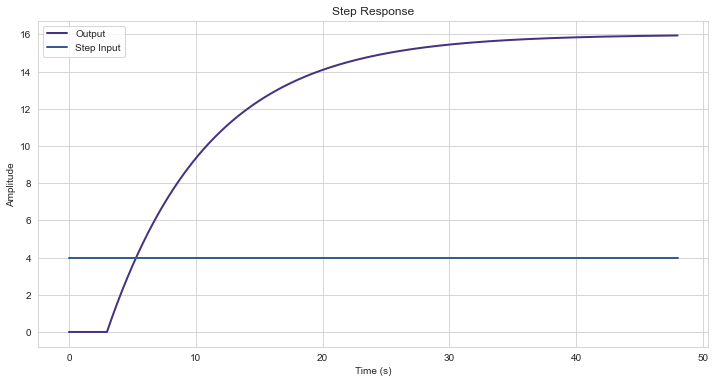

In [3]:
# Visualização da função de transferência
import matplotlib.pyplot as plt
import seaborn as sns

# Lida com estilo do seaborn
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Plota a função de resposta
plt.figure(figsize=(12, 6))
plt.plot(time.T, output, label='Output', linewidth=2)
plt.plot(time.T, step, label='Step Input', linewidth=2)
plt.title('Step Response')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.legend()
plt.show()


O gráfico acima apresenta a função degrau unitário de 4 unidades (Step Input),  
e a resposta (Output) da função em em malha aberta ao ser estimulada pela entrada.

#### Método de Smith para calculo da função de resposta

In [4]:
# Arrendondamento dos valores
out_round = round(output[-1][0])
time_round = round(time.T[-1][0] / len(output), 3)
step_round = round(step[-1][0])

# Definição das variáveis T1 e T2
t1 = (28.1 / 100) * out_round
t2 = (63.2 / 100) * out_round


for x in range(len(output)):
    if (output[x][0] > t1):
        t1 = x * time_round
        break

for y in range(len(output)):
    if (output[y][0] > t2):
        t2 = y * time_round
        break

# Definição da variável TAU
tau = 1.5 * (t2 - t1)

# Definição da variável THETA
theta = (t2 - tau)

# Definição da variável K
k = (out_round) / (step_round)

# Valores
t1, t2, tau, theta, k

(5.7, 11.0, 7.949999999999999, 3.0500000000000007, 4.0)

In [8]:
# Definição da variável Kp
Kp = (1.2 * tau) / (k * theta)

# Definição da variável Ti
Ti = 2 * theta

# Definição da variável Td
Td = 0.5 * theta

# Valores
Kp, Ti, Td

(0.7819672131147538, 6.100000000000001, 1.5250000000000004)

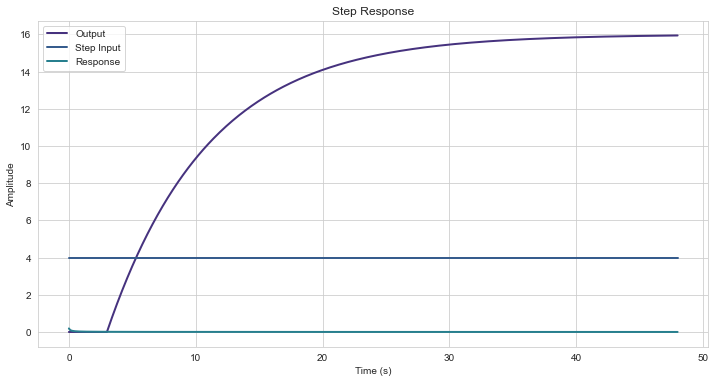

In [7]:
# Calculo da função de resposta
import numpy as np

# Define the function
func_H = lambda s: (k * (np.e ** (-theta))) / ((tau * s) + 1)

# Calculate the response function
response = np.array([func_H(s) for s in time.T])

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(time.T, output, label='Output', linewidth=2)
plt.plot(time.T, step, label='Step Input', linewidth=2)
plt.plot(time.T, response, label='Response', linewidth=2)
plt.title('Step Response')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.legend()
plt.show()
